##Don't close this browser tab while your project is running.

**Run the code block below to start your Clouderizer project. **

In [0]:
ls

sample_data/


In [0]:
!wget https://www.dropbox.com/s/4mtba8cjd1djk7i/view1.tar.xz
!wget https://www.dropbox.com/s/6t0ywvlockk223u/view2.tar.xz
!wget https://www.dropbox.com/s/u85f88kor31bdju/view3.tar.xz
!wget https://www.dropbox.com/s/4nw27i1kvim5uct/view4.tar.xz
!wget https://www.dropbox.com/s/iljbcc0zj21o2q7/view5.tar.xz
!tar -xf view1.tar.xz
!tar -xf view2.tar.xz
!tar -xf view3.tar.xz
!tar -xf view4.tar.xz
!tar -xf view5.tar.xz

--2019-02-23 06:55:41--  https://www.dropbox.com/s/4mtba8cjd1djk7i/view1.tar.xz
Resolving www.dropbox.com (www.dropbox.com)... 162.125.82.1, 2620:100:6032:1::a27d:5201
Connecting to www.dropbox.com (www.dropbox.com)|162.125.82.1|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/raw/4mtba8cjd1djk7i/view1.tar.xz [following]
--2019-02-23 06:55:41--  https://www.dropbox.com/s/raw/4mtba8cjd1djk7i/view1.tar.xz
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc7758b2653f3457285517f9bbdc.dl.dropboxusercontent.com/cd/0/inline/Ab0jCkJGwvDGqdfSi-3Wur2zmgqpZmtIUIlqPSrS7OiFJRwhMWXh0lPo-X2odmmBQry9ExJEl0-BdoA1_Y-ukwUElFPr8WEUS2QJP1XEkIcE5w/file# [following]
--2019-02-23 06:55:41--  https://uc7758b2653f3457285517f9bbdc.dl.dropboxusercontent.com/cd/0/inline/Ab0jCkJGwvDGqdfSi-3Wur2zmgqpZmtIUIlqPSrS7OiFJRwhMWXh0lPo-X2odmmBQry9ExJEl0-BdoA1_Y-ukwUElFPr8WEUS2QJP1XEkIcE5w/file
Resolving uc7758

In [0]:
ls

sample_data/  view2/        view3.tar.xz  view5/
view1/        view2.tar.xz  view4/        view5.tar.xz
view1.tar.xz  view3/        view4.tar.xz


In [0]:
import os
import skimage
from skimage import data,transform
from skimage.transform import resize
import matplotlib.pyplot as plt 
import pandas as pd
import numpy as np
from keras import applications
from keras.models import Model
from keras import optimizers
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.layers.normalization import BatchNormalization
from keras.metrics import categorical_accuracy
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import EarlyStopping,History
from keras.utils import to_categorical
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ModelCheckpoint
from sklearn.preprocessing import LabelEncoder
from sklearn.utils import shuffle
from tqdm import tqdm
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from keras import applications
from PIL import ImageFile
from keras.models import model_from_json
ImageFile.LOAD_TRUNCATED_IMAGES = True
import cv2
%matplotlib inline

Using TensorFlow backend.


In [0]:
def find_label(name):
  if name == "ba":
    label = 0
  elif name == "bu":
    label = 1
  elif name == "ho":
    label = 2
  elif name == "la":
    label = 3
  elif name == "sl":
    label = 4
  else:
    label = 5
    
  return label


In [0]:
def crop_to_square(img):
    if img.shape[0] > img.shape[1]:
        extra = (img.shape[0] - img.shape[1])
        if extra % 2 == 0:
            crop = img[extra // 2:-extra // 2, :]
        else:
            crop = img[max(0, extra // 2 + 1):min(-1, -(extra // 2)), :]
    elif img.shape[1] > img.shape[0]:
        extra = (img.shape[1] - img.shape[0])
        if extra % 2 == 0:
            crop = img[:, extra // 2:-extra // 2]
        else:
            crop = img[:, max(0, extra // 2 + 1):min(-1, -(extra // 2))]
    else:
        crop = img
    return crop
  
def load_data(data_directory):
  images = []
  labels = []
  file_names = [os.path.join(data_directory,f) 
                for f in os.listdir(data_directory)]
  for f in tqdm(file_names):
#     print(f)
    img = skimage.data.imread(f)
    img = crop_to_square(img)
    img = resize(img,(124,124))
    images.append(img)
    labels.append(find_label(f[15:17]))
  return images, labels

In [0]:
label_dict = {0:"backstrap", 1:"buckle", 2:"hook&look", 3:"lace_up", 4:"slip_up", 5:"zipper"}
ilabel_dict = {"backstrap":0, "buckle":1, "hook&look":2, "lace_up":3, "slip_up":4, "zipper":5}

In [0]:
ROOT_PATH = "/content"
train_data_directory = os.path.join(ROOT_PATH, "view1")
images1, labels1 = load_data(train_data_directory)

train_data_directory = os.path.join(ROOT_PATH, "view2")
images2,labels2 = load_data(train_data_directory)

train_data_directory = os.path.join(ROOT_PATH, "view3")
images3,labels3 = load_data(train_data_directory)

train_data_directory = os.path.join(ROOT_PATH, "view4")
images4,labels4 = load_data(train_data_directory)


  0%|          | 0/2156 [00:00<?, ?it/s]/usr/local/lib/python3.6/dist-packages/skimage/transform/_warps.py:84: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "
100%|██████████| 2150/2150 [03:18<00:00, 11.07it/s]


In [0]:
images1 = np.array(images1)
images2 = np.array(images2)
images3 = np.array(images3)
images4 = np.array(images4)

In [0]:
ROOT_PATH = "/content"
train_data_directory = os.path.join(ROOT_PATH, "view5")
images5,labels5 = load_data(train_data_directory)
images5 = np.array(images5)

  0%|          | 0/2124 [00:00<?, ?it/s]/usr/local/lib/python3.6/dist-packages/skimage/transform/_warps.py:84: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "
100%|██████████| 2124/2124 [03:08<00:00, 11.39it/s]


In [0]:
def onehot(label):
  label = np.array(label).reshape(len(label),1)
  onehotencoder = OneHotEncoder()
  onehotencoder.fit(label) 
  xlabels = onehotencoder.transform(label).toarray()
  return xlabels

In [0]:
vgg_model = applications.VGG16(weights='imagenet',
                               include_top=False,
                               input_shape=(124, 124, 3))

Instructions for updating:
Colocations handled automatically by placer.
58892288/58889256 [==============================] - 6s 0us/step


In [0]:
vgg_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 124, 124, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 124, 124, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 124, 124, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 62, 62, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 62, 62, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 62, 62, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 31, 31, 128)       0         
__________

In [0]:
def create_model():
  layer_dict = dict([(layer.name, layer) for layer in vgg_model.layers])
  x = layer_dict['block5_pool'].output
  x = Flatten()(x)
  x = Dense(1024, activation='relu')(x)
  x = Dropout(0.2)(x)
  x = Dense(6, activation='softmax')(x)
  return x

In [0]:
def train(images,xlabels,name):
  from keras.models import Model
  custom_model = Model(input=vgg_model.input, output=create_model())
  for layer in custom_model.layers[:18]:
    layer.trainable = False
  optimizer=optimizers.adam(lr=0.0002)
  custom_model.compile(loss='categorical_crossentropy',
                     optimizer=optimizer,metrics=['accuracy'])
  train_model=custom_model.fit(images,xlabels,validation_split=0.1,epochs=10,batch_size=32)
  weightname = str(name) + ".h5"  
  custom_model.save_weights("weightname")
  print("Saved model to disk")
  return custom_model

In [0]:
view1 = train(images1,onehot(labels1),"view1")
view2 = train(images2,onehot(labels2),"view2")
view3 = train(images3,onehot(labels3),"view3")
view4 = train(images4,onehot(labels4),"view4")
view5= train(images5,onehot(labels5),"view5")

Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Instructions for updating:
Use tf.cast instead.


/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_encoders.py:368: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=Tensor("in..., outputs=Tensor("de...)`
  This is separate from the ipykernel package so we can avoid doing imports until


Train on 1940 samples, validate on 216 samples
Epoch 1/10
1940/1940 [==============================] - 13s 7ms/step - loss: 0.9856 - acc: 0.6515 - val_loss: 0.6911 - val_acc: 0.7500
Epoch 2/10
1940/1940 [==============================] - 7s 4ms/step - loss: 0.5146 - acc: 0.8242 - val_loss: 0.6944 - val_acc: 0.7593
Epoch 3/10
1940/1940 [==============================] - 7s 4ms/step - loss: 0.4020 - acc: 0.8706 - val_loss: 0.6519 - val_acc: 0.7593
Epoch 4/10
1940/1940 [==============================] - 7s 4ms/step - loss: 0.3228 - acc: 0.9036 - val_loss: 0.5783 - val_acc: 0.8333
Epoch 5/10
1940/1940 [==============================] - 7s 4ms/step - loss: 0.2561 - acc: 0.9170 - val_loss: 0.5744 - val_acc: 0.8194
Epoch 6/10
1940/1940 [==============================] - 7s 4ms/step - loss: 0.2119 - acc: 0.9345 - val_loss: 0.6227 - val_acc: 0.8148
Epoch 7/10
1940/1940 [==============================] - 7s 4ms/step - loss: 0.1700 - acc: 0.9521 - val_loss: 0.5351 - val_acc: 0.8287
Epoch 8/10
194

/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_encoders.py:368: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=Tensor("in..., outputs=Tensor("de...)`
  This is separate from the ipykernel package so we can avoid doing imports until


Train on 1940 samples, validate on 216 samples
Epoch 1/10
1940/1940 [==============================] - 8s 4ms/step - loss: 1.2737 - acc: 0.5428 - val_loss: 0.9874 - val_acc: 0.6481
Epoch 2/10
1940/1940 [==============================] - 7s 4ms/step - loss: 0.6817 - acc: 0.7572 - val_loss: 0.8575 - val_acc: 0.6759
Epoch 3/10
1940/1940 [==============================] - 7s 4ms/step - loss: 0.5130 - acc: 0.8247 - val_loss: 0.7908 - val_acc: 0.7176
Epoch 4/10
1940/1940 [==============================] - 7s 4ms/step - loss: 0.3908 - acc: 0.8773 - val_loss: 0.8631 - val_acc: 0.7037
Epoch 5/10
1940/1940 [==============================] - 7s 4ms/step - loss: 0.2934 - acc: 0.9155 - val_loss: 0.7361 - val_acc: 0.7176
Epoch 6/10
1940/1940 [==============================] - 7s 4ms/step - loss: 0.2281 - acc: 0.9392 - val_loss: 0.7431 - val_acc: 0.7407
Epoch 7/10
1940/1940 [==============================] - 7s 4ms/step - loss: 0.1773 - acc: 0.9593 - val_loss: 0.7637 - val_acc: 0.7361
Epoch 8/10
1940

/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_encoders.py:368: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=Tensor("in..., outputs=Tensor("de...)`
  This is separate from the ipykernel package so we can avoid doing imports until


Train on 1935 samples, validate on 216 samples
Epoch 1/10
1935/1935 [==============================] - 9s 4ms/step - loss: 1.0803 - acc: 0.6047 - val_loss: 0.7972 - val_acc: 0.6991
Epoch 2/10
1935/1935 [==============================] - 7s 4ms/step - loss: 0.5945 - acc: 0.7933 - val_loss: 0.7480 - val_acc: 0.7176
Epoch 3/10
1935/1935 [==============================] - 7s 4ms/step - loss: 0.4447 - acc: 0.8403 - val_loss: 0.8452 - val_acc: 0.6898
Epoch 4/10
1935/1935 [==============================] - 7s 4ms/step - loss: 0.3954 - acc: 0.8574 - val_loss: 0.5766 - val_acc: 0.7870
Epoch 5/10
1935/1935 [==============================] - 7s 4ms/step - loss: 0.2959 - acc: 0.9044 - val_loss: 0.5755 - val_acc: 0.7778
Epoch 6/10
1935/1935 [==============================] - 7s 4ms/step - loss: 0.2568 - acc: 0.9147 - val_loss: 0.5644 - val_acc: 0.8056
Epoch 7/10
1935/1935 [==============================] - 7s 4ms/step - loss: 0.2261 - acc: 0.9344 - val_loss: 0.6575 - val_acc: 0.7593
Epoch 8/10
1935

/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_encoders.py:368: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=Tensor("in..., outputs=Tensor("de...)`
  This is separate from the ipykernel package so we can avoid doing imports until


Train on 1935 samples, validate on 215 samples
Epoch 1/10
1935/1935 [==============================] - 9s 5ms/step - loss: 1.2343 - acc: 0.5251 - val_loss: 0.9448 - val_acc: 0.6465
Epoch 2/10
1935/1935 [==============================] - 7s 4ms/step - loss: 0.7438 - acc: 0.7416 - val_loss: 0.8463 - val_acc: 0.6884
Epoch 3/10
1935/1935 [==============================] - 7s 4ms/step - loss: 0.5835 - acc: 0.8103 - val_loss: 0.8672 - val_acc: 0.6791
Epoch 4/10
1935/1935 [==============================] - 7s 4ms/step - loss: 0.4812 - acc: 0.8439 - val_loss: 0.9326 - val_acc: 0.6791
Epoch 5/10
1935/1935 [==============================] - 7s 4ms/step - loss: 0.3726 - acc: 0.8848 - val_loss: 0.7595 - val_acc: 0.7070
Epoch 6/10
1935/1935 [==============================] - 7s 4ms/step - loss: 0.3239 - acc: 0.8987 - val_loss: 0.7733 - val_acc: 0.6977
Epoch 7/10
1935/1935 [==============================] - 7s 4ms/step - loss: 0.2799 - acc: 0.9183 - val_loss: 0.6775 - val_acc: 0.7953
Epoch 8/10
1935

/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_encoders.py:368: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=Tensor("in..., outputs=Tensor("de...)`
  This is separate from the ipykernel package so we can avoid doing imports until


Train on 1911 samples, validate on 213 samples
Epoch 1/10
1911/1911 [==============================] - 9s 5ms/step - loss: 1.1424 - acc: 0.5615 - val_loss: 0.8791 - val_acc: 0.6901
Epoch 2/10
1911/1911 [==============================] - 7s 4ms/step - loss: 0.6710 - acc: 0.7692 - val_loss: 0.7284 - val_acc: 0.7371
Epoch 3/10
1911/1911 [==============================] - 7s 4ms/step - loss: 0.5226 - acc: 0.8242 - val_loss: 0.7562 - val_acc: 0.7089
Epoch 4/10
1911/1911 [==============================] - 7s 4ms/step - loss: 0.4355 - acc: 0.8509 - val_loss: 0.7088 - val_acc: 0.7418
Epoch 5/10
1911/1911 [==============================] - 7s 4ms/step - loss: 0.3420 - acc: 0.8969 - val_loss: 0.6591 - val_acc: 0.7887
Epoch 6/10
1911/1911 [==============================] - 7s 4ms/step - loss: 0.2901 - acc: 0.9095 - val_loss: 0.6838 - val_acc: 0.7793
Epoch 7/10
1911/1911 [==============================] - 7s 4ms/step - loss: 0.2598 - acc: 0.9241 - val_loss: 0.6919 - val_acc: 0.7840
Epoch 8/10
1911

In [0]:
np.shape(images1[0])

(124, 124, 3)

In [0]:
def convert_image(image):
  shape = np.shape(image)
  image = image.reshape(1,shape[0],shape[1],shape[2])

  return image

In [0]:
view_dict = {0:'view1',1:'view2',2:'view3',3:'view4',4:'view5'}
iview_dict = {'view1':0,'view2':1,'view3':2,'view4':3,'view5':4}
def identify_view(images,label):
  prob = []
  image = convert_image(images[0])
  plt.imshow(images[0])
  pred = (view1.predict(image,steps=None))
  prob.append(pred[0][label])
  pred = view1.predict(convert_image(images[1]))
  prob.append(pred[0][label])
  pred = view1.predict(convert_image(images[2]))
  prob.append(pred[0][label])
  pred = view1.predict(convert_image(images[3]))
  prob.append(pred[0][label])
  pred = view1.predict(convert_image(images[4]))
  prob.append(pred[0][label])
  res = np.argmax(np.array(prob))
  return view_dict[res]

In [0]:
inp = []
inp.append(images1[1])
inp.append(images2[1])
inp.append(images3[1])
inp.append(images4[1])
inp.append(images5[1])

view1


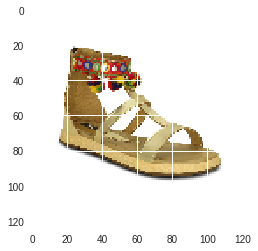

In [0]:
print(identify_view(inp,labels1[1]))
  

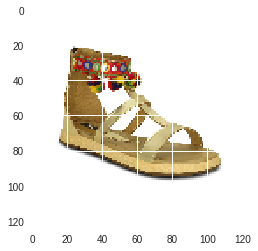

In [0]:
plt.imshow(images1[1])

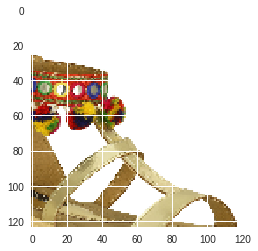

In [0]:
 plt.imshow(images2[1])

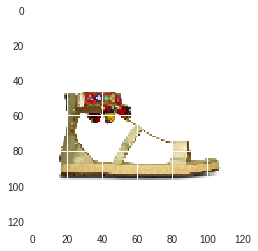

In [0]:
plt.imshow(images3[1])

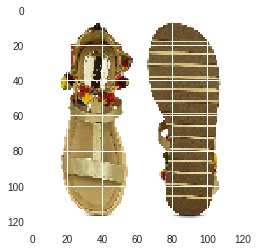

In [0]:
plt.imshow(images4[1])

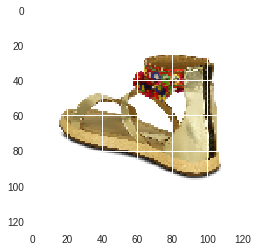

In [0]:
plt.imshow(images5[1])